Klaster markazlari:
[[0.5117158  0.70143737 0.11440946]
 [0.40275811 0.19582703 0.55347375]
 [0.39801202 0.84259962 0.71072398]]


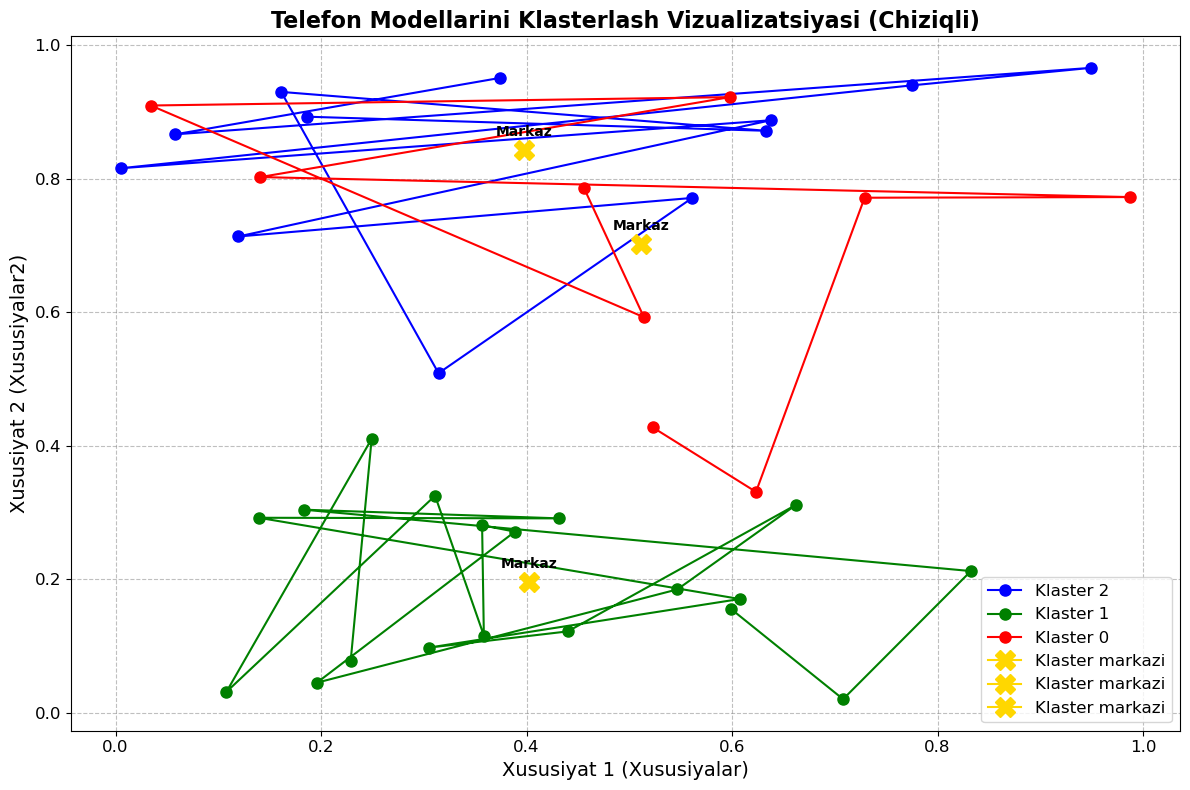

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tasodifiy ma'lumot yaratish (40 ta namuna, 3 ta xususiyat)
np.random.seed(42)
data = np.random.rand(40, 3)  # (40 ta misol, 3 ta xususiyat)

# Pandas DataFrame shaklida ma'lumotlarni ko'rib chiqamiz
df = pd.DataFrame(data, columns=['Xususiyalar1', 'Xususiyalar2', 'Xususiyalar3'])

# KMeans klasterlash (3 ta klaster)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Har bir misolning klasterini aniqlash
df['Cluster'] = kmeans.labels_

# Klaster markazlarini ko'rib chiqamiz
print("Klaster markazlari:")
print(kmeans.cluster_centers_)

# Ma'lumotlarni chizish (chiziqlar bilan)
plt.figure(figsize=(12, 8))

# Har bir klaster uchun chiziqli vizualizatsiya
unique_clusters = df['Cluster'].unique()
colors = ['blue', 'green', 'red']  # Har bir klaster uchun rang
for cluster_id, color in zip(unique_clusters, colors):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.plot(
        cluster_data['Xususiyalar1'],
        cluster_data['Xususiyalar2'],
        linestyle='-',  # Chiziq turi
        color=color,  # Chiziq rangi
        linewidth=1.5,  # Chiziq qalinligi
        marker='o',  # Nuqta ko'rinishi 
        markersize=8,  # Nuqta o'lchami
        label=f"Klaster {cluster_id}"  # Klaster yorlig'i
    )

# Klaster markazlarini chizish (strelkalar bilan ko'rsatish)
for center in kmeans.cluster_centers_:
    plt.plot(
        center[0],
        center[1],
        marker='X',  # Markaz shakli
        markersize=15,
        color='gold',
        label='Klaster markazi'
    )
    plt.annotate(
        'Markaz',
        (center[0], center[1]),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=10,
        color='black',
        fontweight="bold"
    )

# Grafik sozlamalari
plt.title("Telefon Modellarini Klasterlash Vizualizatsiyasi (Chiziqli)", fontsize=16, fontweight='bold')
plt.xlabel("Xususiyat 1 (Xususiyalar)", fontsize=14)
plt.ylabel("Xususiyat 2 (Xususiyalar2)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='best')
plt.tight_layout()

plt.show()